<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


Install the below libraries


In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab



In [ ]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


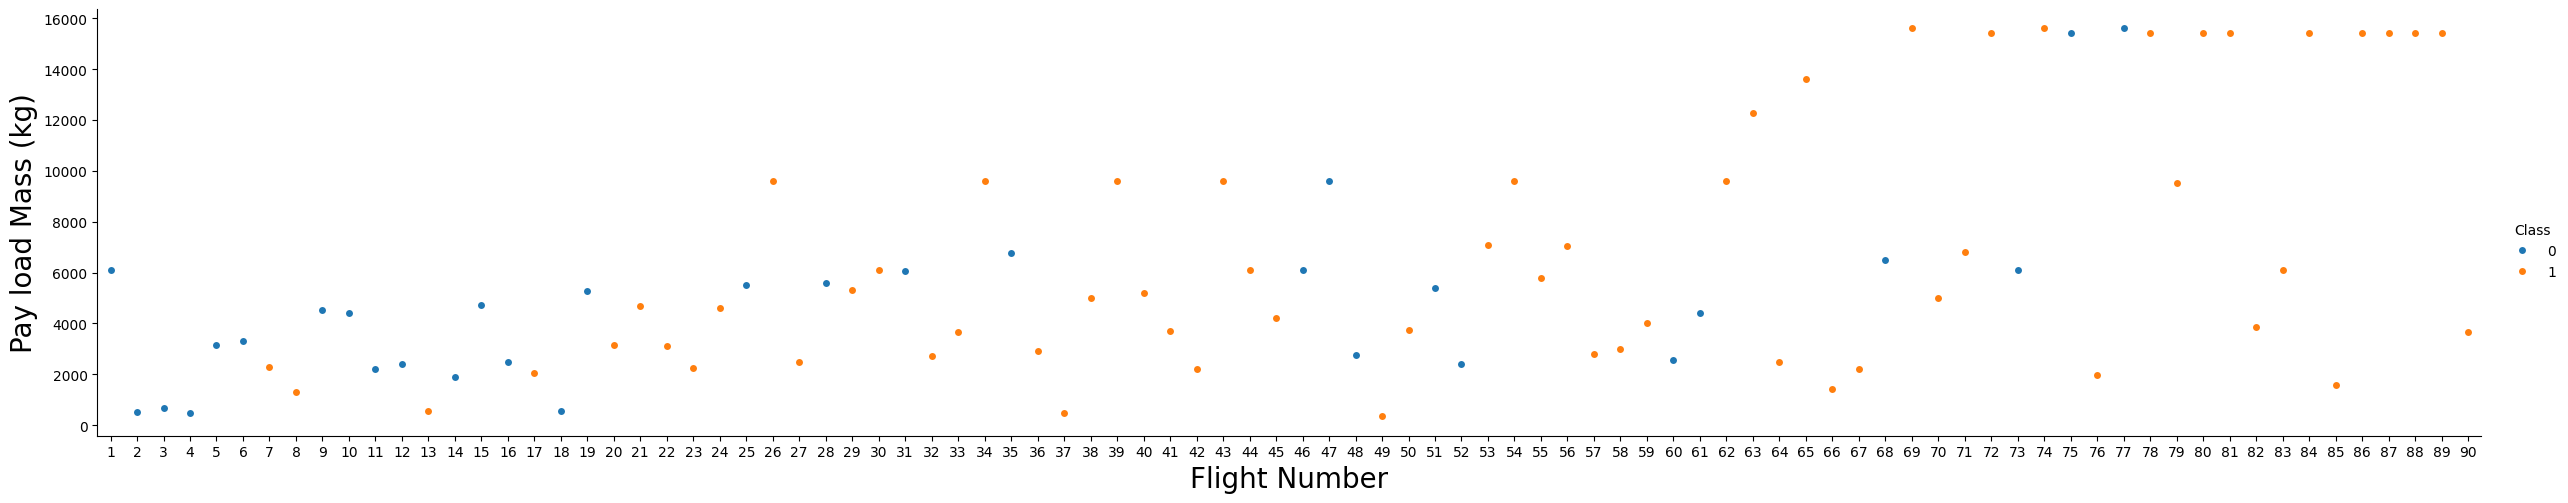

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


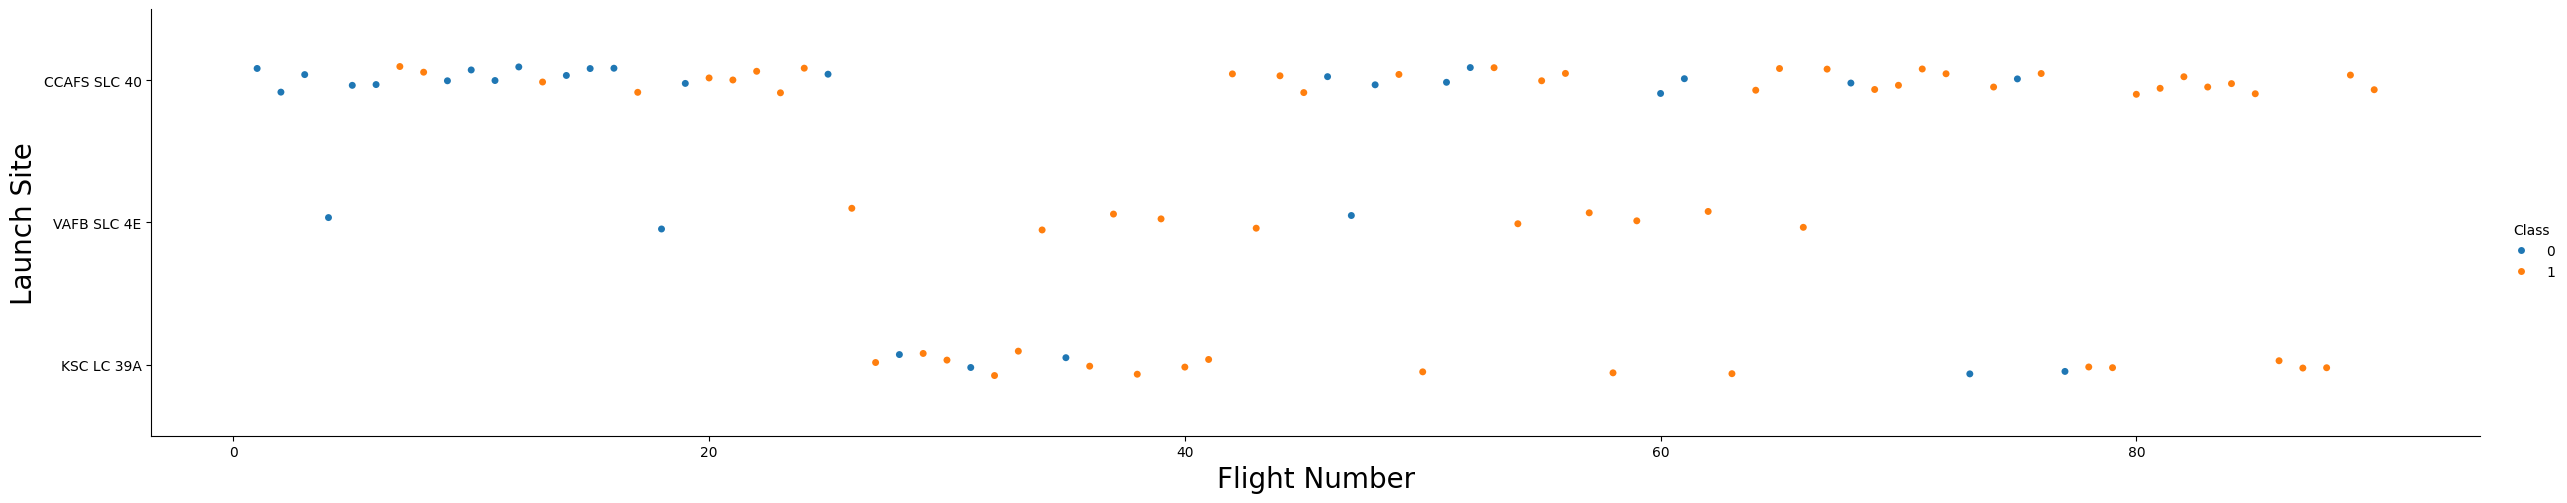

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


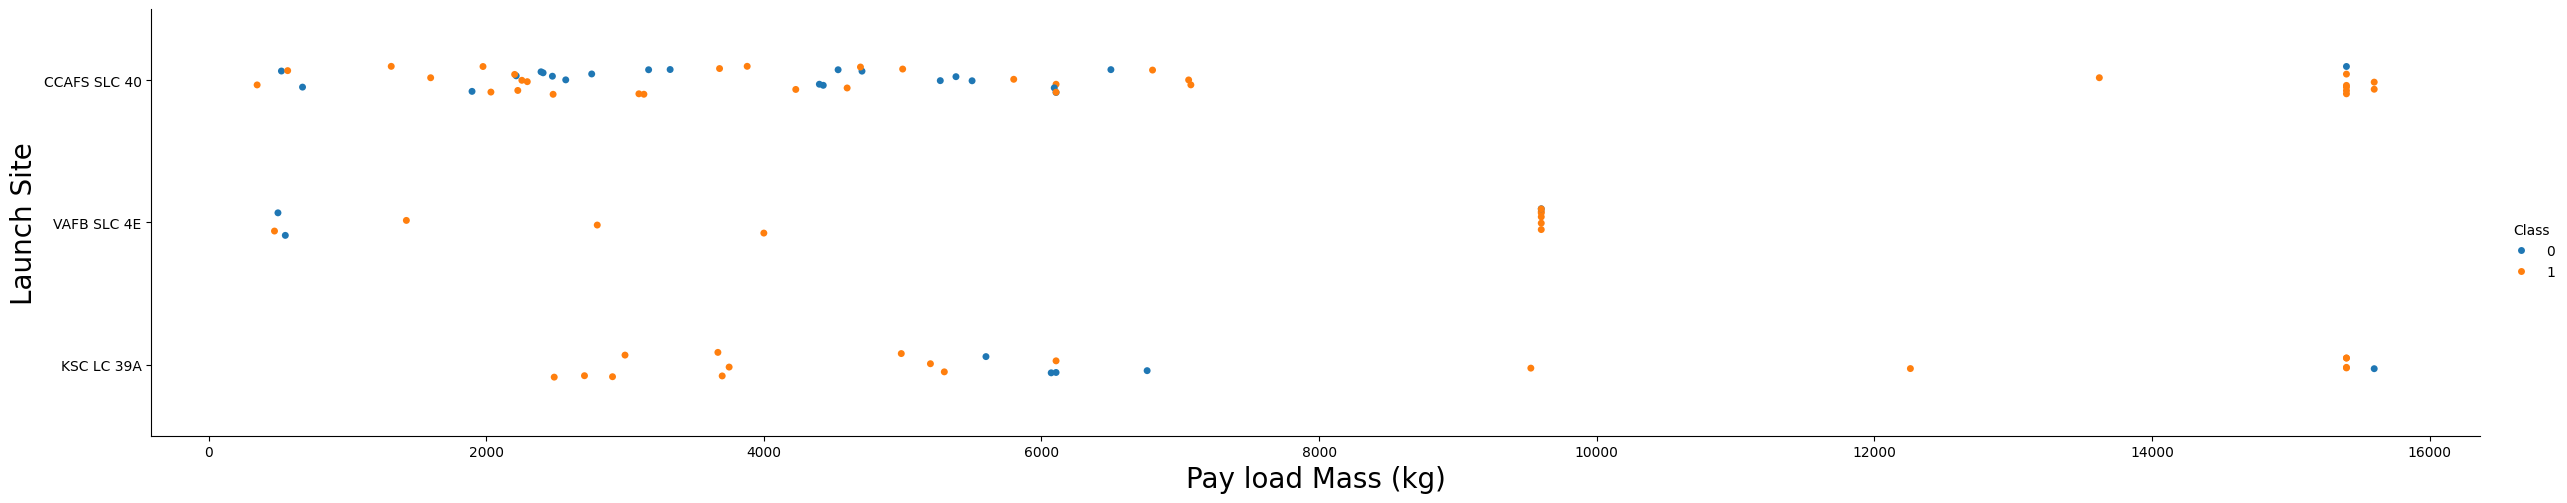

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


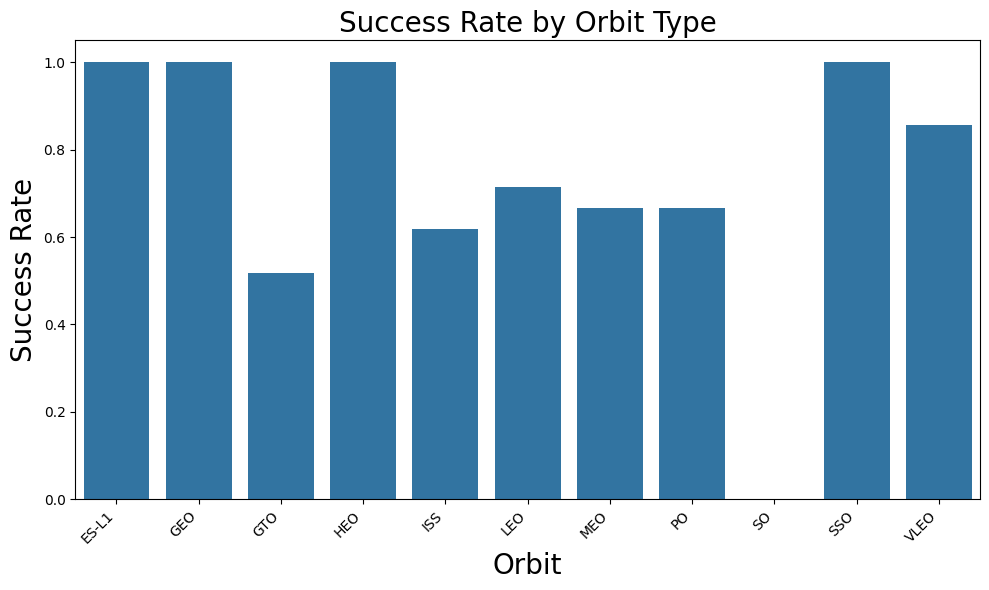

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


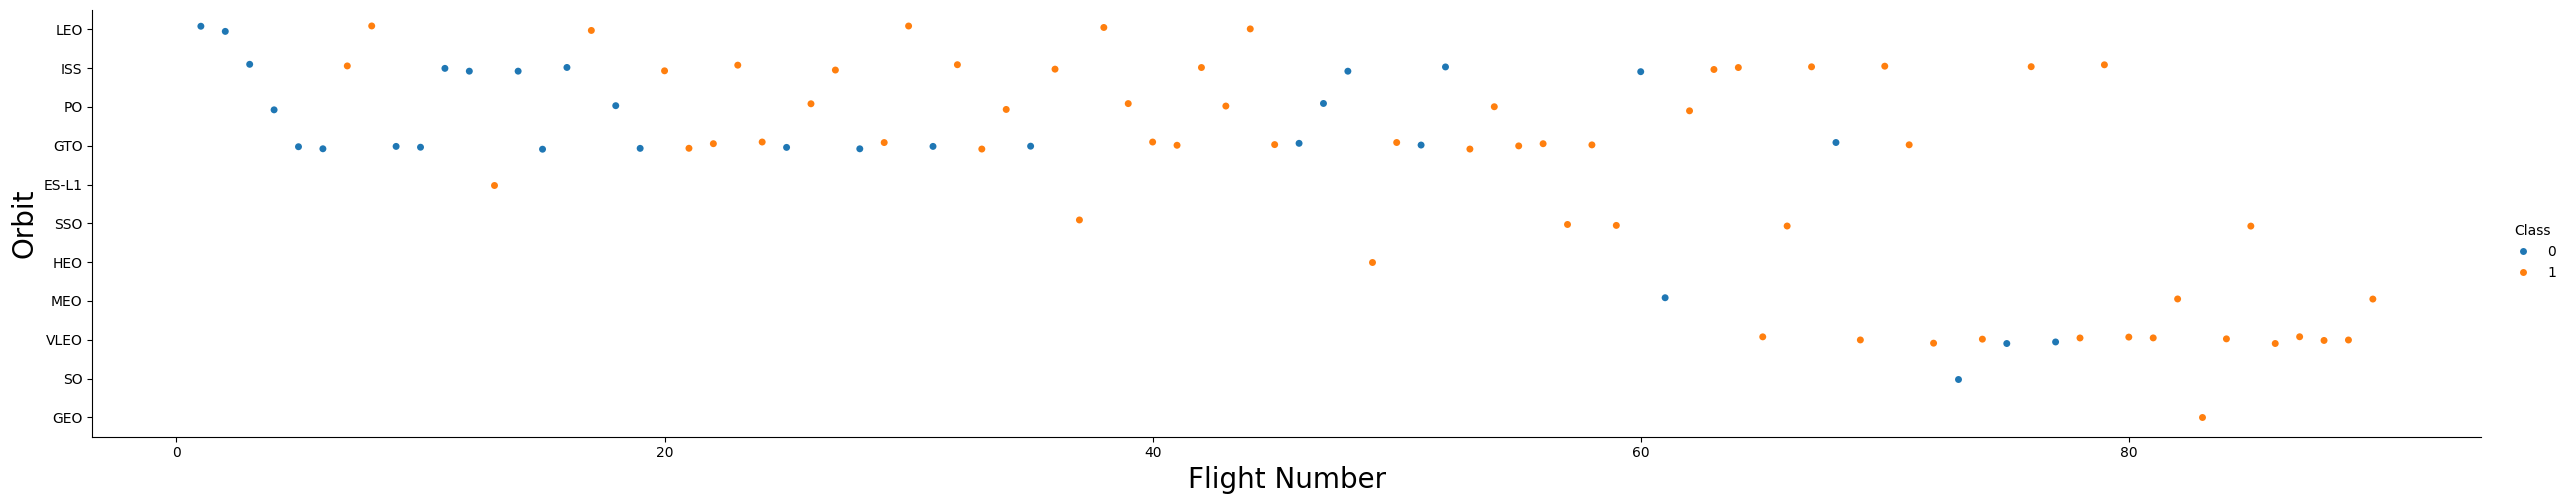

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


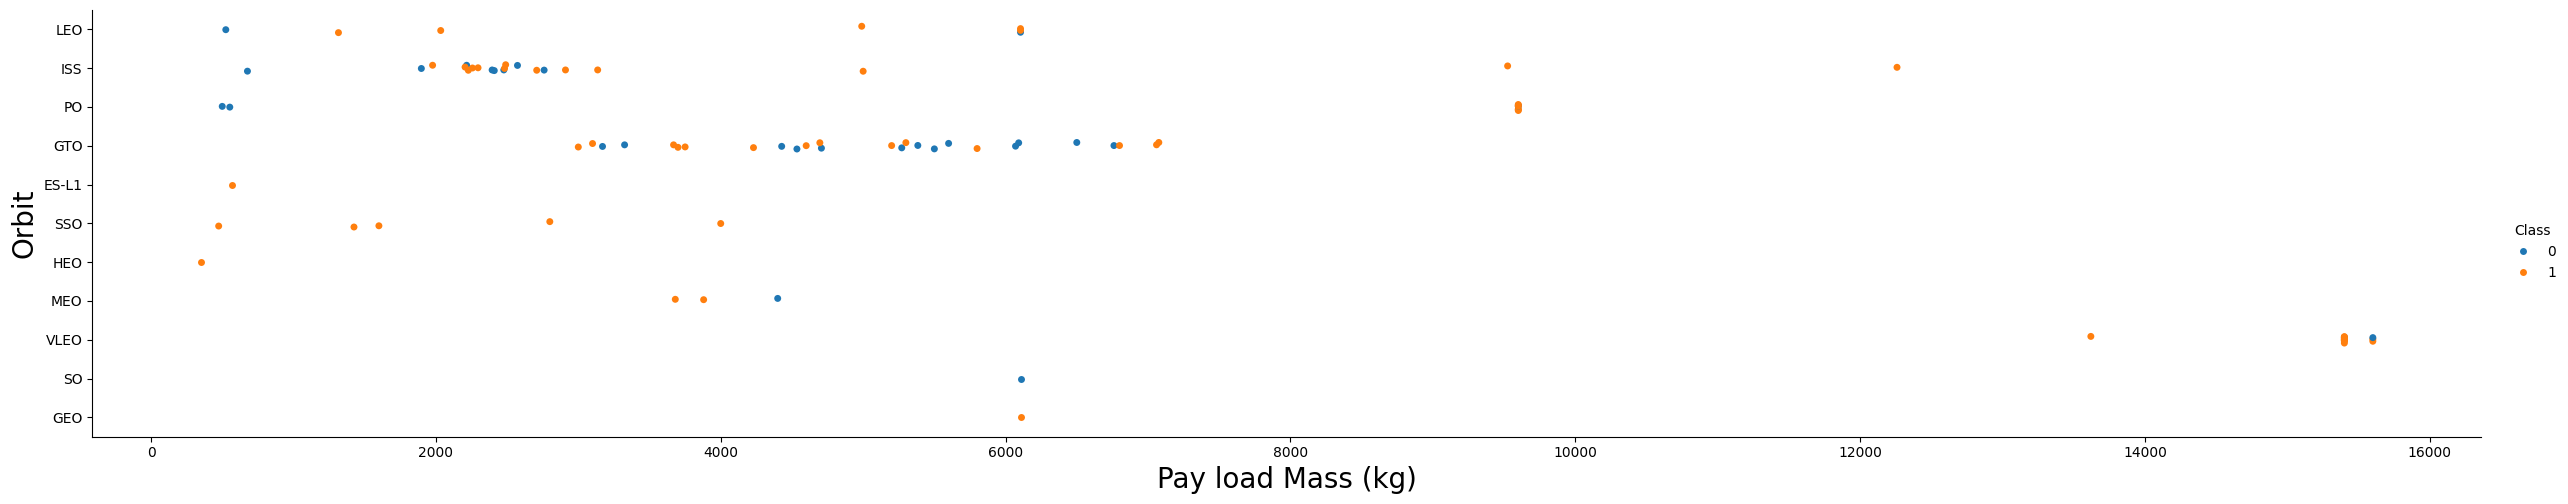

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


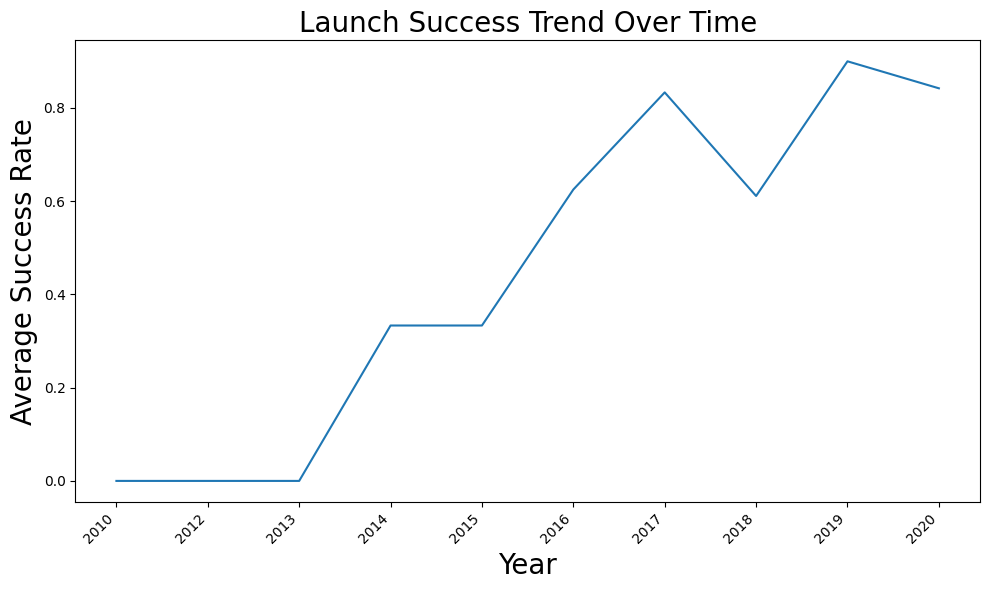

In [ ]:
# A function to Extract years from the date
year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Extract the year from the 'Date' column
df['Year'] = Extract_year(df['Date'])

# Calculate the average success rate per year
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Success Rate", fontsize=20)
plt.title("Launch Success Trend Over Time", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.


In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

unique_launch_sites = df['LaunchSite'].unique()
print(unique_launch_sites)

['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [ ]:
ccr_launch_sites = df[df['LaunchSite'].str.startswith('CCR')]
print(ccr_launch_sites.head())

Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude, Class]
Index: []


In [ ]:
ccafs_records = df[df['LaunchSite'] == 'CCAFS SLC 40']
print(ccafs_records.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class 

In [2]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Filter for NASA launches (assuming 'LaunchSite' contains "KSC LC 39A" which is NASA's launch complex)
nasa_launches = df[df['LaunchSite'] == 'KSC LC 39A']

# Calculate the total payload mass for NASA launches
total_nasa_payload = nasa_launches['PayloadMass'].sum()

print(f"The total payload carried by boosters from NASA's KSC LC 39A launch site is: {total_nasa_payload:.2f} kg")

The total payload carried by boosters from NASA's KSC LC 39A launch site is: 167341.92 kg


In [3]:
# Filter for 'F9 v1.1' booster version
f9_v1_1_boosters = df[df['BoosterVersion'] == 'F9 v1.1']

# Calculate the average payload mass
average_payload_f9_v1_1 = f9_v1_1_boosters['PayloadMass'].mean()

print(f"The average payload mass for the F9 v1.1 booster version is: {average_payload_f9_v1_1:.2f} kg")

The average payload mass for the F9 v1.1 booster version is: nan kg


In [4]:
# Filter for successful landing outcomes on ground pad
successful_ground_landings = df[df['Outcome'] == 'True ASDS'] # Assuming 'True ASDS' represents a successful ground pad landing, you might need to adjust this based on your dataset's 'Outcome' values.

# Sort by date to find the first successful landing
first_successful_ground_landing = successful_ground_landings.sort_values(by='Date').iloc[0]

print("Date of the first successful landing outcome on ground pad:")
print(first_successful_ground_landing['Date'])

Date of the first successful landing outcome on ground pad:
2016-04-08


In [5]:
# Filter for successful landings on drone ship and payload mass between 4000 kg and 6000 kg
filtered_boosters = df[(df['Outcome'] == 'True ASDS') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

# Get the unique booster names
booster_names = filtered_boosters['BoosterVersion'].unique()

print("Boosters that successfully landed on a drone ship with payload mass between 4000kg and 6000kg:")
for name in booster_names:
    print(name)

Boosters that successfully landed on a drone ship with payload mass between 4000kg and 6000kg:
Falcon 9


In [6]:
# Calculate the count of successful and failure mission outcomes
outcome_counts = df['Outcome'].value_counts()

print("Total number of successful and failure mission outcomes:")
print(outcome_counts)

Total number of successful and failure mission outcomes:
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [7]:
# Find the maximum payload mass
max_payload = df['PayloadMass'].max()

# Filter the dataframe to get rows with the maximum payload mass
boosters_with_max_payload = df[df['PayloadMass'] == max_payload]

# Get the unique booster names from the filtered dataframe
booster_names_max_payload = boosters_with_max_payload['BoosterVersion'].unique()

print(f"Boosters that carried the maximum payload mass ({max_payload:.2f} kg):")
for name in booster_names_max_payload:
    print(name)

Boosters that carried the maximum payload mass (15600.00 kg):
Falcon 9


In [8]:
# Filter for failed landing outcomes on drone ship ('False ASDS')
failed_drone_landings = df[df['Outcome'] == 'False ASDS']

# Convert 'Date' column to datetime objects
failed_drone_landings['Date'] = pd.to_datetime(failed_drone_landings['Date'])

# Filter for the year 2015
failed_drone_landings_2015 = failed_drone_landings[failed_drone_landings['Date'].dt.year == 2015]

# Select the relevant columns
result = failed_drone_landings_2015[['Outcome', 'BoosterVersion', 'LaunchSite']]

print("Failed landing outcomes on drone ship, their booster versions, and launch site names for the year 2015:")
print(result)

Failed landing outcomes on drone ship, their booster versions, and launch site names for the year 2015:
       Outcome BoosterVersion    LaunchSite
11  False ASDS       Falcon 9  CCAFS SLC 40
13  False ASDS       Falcon 9  CCAFS SLC 40


/tmp/ipython-input-671232945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_drone_landings['Date'] = pd.to_datetime(failed_drone_landings['Date'])


In [9]:
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for the specified date range
filtered_df = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

# Calculate the count of each outcome in the filtered data
outcome_counts_ranked = filtered_df['Outcome'].value_counts().sort_values(ascending=False)

print("Rank of landing outcomes between 2010-06-04 and 2017-03-20 (descending order):")
print(outcome_counts_ranked)

Rank of landing outcomes between 2010-06-04 and 2017-03-20 (descending order):
Outcome
None None      9
True ASDS      5
False ASDS     4
True RTLS      3
True Ocean     3
False Ocean    2
None ASDS      2
Name: count, dtype: int64


In [10]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [11]:
import folium

# Get the unique launch sites and their coordinates from the dataframe
launch_sites = df[['LaunchSite', 'Latitude', 'Longitude']].drop_duplicates()

# Create a Folium map centered around a location that should include all sites
# A central point between the sites could be calculated, or a general area like Florida/California coast
# For simplicity, let's use a central point that should cover the US launch sites
map_center = [launch_sites['Latitude'].mean(), launch_sites['Longitude'].mean()]
spacex_map = folium.Map(location=map_center, zoom_start=5) # Adjust zoom_start as needed

# Add a marker for each launch site
for index, site in launch_sites.iterrows():
    folium.Marker(
        location=[site['Latitude'], site['Longitude']],
        popup=site['LaunchSite'],
    ).add_to(spacex_map)

# Display the map
spacex_map

In [12]:
# Filter out rows with missing Latitude or Longitude if any
df_cleaned = df.dropna(subset=['Latitude', 'Longitude', 'Class'])

# Create a Folium map centered around a location that should include all sites
map_center = [df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()]
spacex_outcome_map = folium.Map(location=map_center, zoom_start=5) # Adjust zoom_start as needed

# Define colors for successful (1) and unsuccessful (0) outcomes
colors = {0: 'red', 1: 'green'}

# Add a marker for each launch attempt, colored by outcome
for index, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors[row['Class']],
        fill=True,
        fill_color=colors[row['Class']],
        fill_opacity=0.6,
        popup=f"Flight Number: {row['FlightNumber']}<br>Outcome: {row['Outcome']}<br>Launch Site: {row['LaunchSite']}"
    ).add_to(spacex_outcome_map)

# Display the map
spacex_outcome_map

# Task
Explore the generated folium map and show the screenshot of a selected launch site to its proximities such as railway, highway, coastline, with distance calculated and displayed

## Select a launch site

### Subtask:
Choose one of the launch sites from the dataset to focus on.


**Reasoning**:
I will examine the `launch_sites` DataFrame to identify the available launch sites and their coordinates and choose one of the launch sites to focus on.



In [13]:
display(launch_sites)

,LaunchSite,Latitude,Longitude
0,CCAFS SLC 40,28.561857,-80.577366
3,VAFB SLC 4E,34.632093,-120.610829
26,KSC LC 39A,28.608058,-80.603956


## Identify nearby features

### Subtask:
Programmatically find or define the coordinates of nearby railways, highways, and coastline points relevant to the selected launch site ('KSC LC 39A').


**Reasoning**:
Define the coordinates for the selected launch site and research and define approximate coordinates for nearby railway, highway, and coastline points, storing them in a dictionary.



In [14]:
# 1. Define the coordinates for the selected launch site, 'KSC LC 39A'
# Assuming launch_sites DataFrame is available and contains the coordinates for KSC LC 39A
ksc_coords = launch_sites[launch_sites['LaunchSite'] == 'KSC LC 39A'].iloc[0]
ksc_latitude = ksc_coords['Latitude']
ksc_longitude = ksc_coords['Longitude']

# 2. Research and define approximate coordinates for a relevant nearby railway line.
# Based on general knowledge and online maps of the area around Kennedy Space Center
# A point on the Florida East Coast Railway near the complex
railway_latitude = 28.5720  # Approximate latitude
railway_longitude = -80.7918 # Approximate longitude

# 3. Research and define approximate coordinates for a relevant nearby highway.
# Based on general knowledge and online maps, Interstate 95 is a major highway nearby.
# A point on I-95 near the complex
highway_latitude = 28.5852  # Approximate latitude
highway_longitude = -80.8076 # Approximate longitude

# 4. Research and define approximate coordinates for a point on the nearest coastline to 'KSC LC 39A'.
# Based on general knowledge and online maps, the Atlantic coast is very close.
# A point on the coastline directly east of KSC LC 39A
coastline_latitude = 28.6080 # Approximate latitude (similar to KSC LC 39A)
coastline_longitude = -80.5000 # Approximate longitude (on the coast)


# 5. Store these coordinates in a structured format
proximity_coords = {
    'KSC LC 39A': {'latitude': ksc_latitude, 'longitude': ksc_longitude},
    'Railway': {'latitude': railway_latitude, 'longitude': railway_longitude},
    'Highway': {'latitude': highway_latitude, 'longitude': highway_longitude},
    'Coastline': {'latitude': coastline_latitude, 'longitude': coastline_longitude}
}

print("Defined proximity coordinates:")
print(proximity_coords)

Defined proximity coordinates:
{'KSC LC 39A': {'latitude': np.float64(28.6080585), 'longitude': np.float64(-80.6039558)}, 'Railway': {'latitude': 28.572, 'longitude': -80.7918}, 'Highway': {'latitude': 28.5852, 'longitude': -80.8076}, 'Coastline': {'latitude': 28.608, 'longitude': -80.5}}


## Calculate distances

### Subtask:
Calculate the distance from the selected launch site ('KSC LC 39A') to the identified nearby features (railway, highway, and coastline).


**Reasoning**:
Calculate the distance from the selected launch site ('KSC LC 39A') to the identified nearby features (railway, highway, and coastline).



In [15]:
from geographiclib.geodesic import Geodesic

# Define a function to calculate the distance between two sets of coordinates
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the geodesic distance between two points on the Earth.

    Args:
        lat1 (float): Latitude of the first point.
        lon1 (float): Longitude of the first point.
        lat2 (float): Latitude of the second point.
        lon2 (float): Longitude of the second point.

    Returns:
        float: The geodesic distance between the two points in kilometers.
    """
    # Create a Geodesic object and calculate the distance
    geo = Geodesic.WGS84
    g = geo.Inverse(lat1, lon1, lat2, lon2)
    distance_meters = g['s12']
    distance_km = distance_meters / 1000.0
    return distance_km

# Get the coordinates for the KSC LC 39A launch site
ksc_latitude = proximity_coords['KSC LC 39A']['latitude']
ksc_longitude = proximity_coords['KSC LC 39A']['longitude']

# Iterate through the nearby features and calculate the distance
distances = {}
for feature, coords in proximity_coords.items():
    if feature != 'KSC LC 39A': # Don't calculate distance from site to itself
        feature_latitude = coords['latitude']
        feature_longitude = coords['longitude']
        distance = calculate_distance(ksc_latitude, ksc_longitude, feature_latitude, feature_longitude)
        distances[feature] = distance

# Store the calculated distances (optional, adding to proximity_coords for easy access later)
for feature, distance in distances.items():
    proximity_coords[feature]['distance_km'] = distance

# Print the calculated distances
print("Distances from KSC LC 39A:")
for feature, distance in distances.items():
    print(f"{feature}: {distance:.2f} km")

Distances from KSC LC 39A:
Railway: 18.80 km
Highway: 20.08 km
Coastline: 10.17 km


## Visualize on map

### Subtask:
Create a Folium map centered on the selected launch site ('KSC LC 39A') and add markers for the launch site and nearby features (railway, highway, coastline). Include popups with relevant information and optionally add lines showing the calculated distances.


**Reasoning**:
Create a Folium map centered on KSC LC 39A and add markers for the launch site and nearby features, including popups with information and lines showing distances.



In [16]:
# Get the coordinates for the KSC LC 39A launch site
ksc_latitude = proximity_coords['KSC LC 39A']['latitude']
ksc_longitude = proximity_coords['KSC LC 39A']['longitude']

# Create a Folium map centered at the KSC LC 39A coordinates
spacex_proximity_map = folium.Map(location=[ksc_latitude, ksc_longitude], zoom_start=10)

# Add a marker for KSC LC 39A
folium.Marker(
    location=[ksc_latitude, ksc_longitude],
    popup='KSC LC 39A Launch Site',
    icon=folium.Icon(color='blue')
).add_to(spacex_proximity_map)

# Iterate through the nearby features and add markers and lines
for feature, coords in proximity_coords.items():
    if feature != 'KSC LC 39A':
        feature_latitude = coords['latitude']
        feature_longitude = coords['longitude']
        distance = coords.get('distance_km', None) # Get the calculated distance

        # Add a marker for the nearby feature
        folium.Marker(
            location=[feature_latitude, feature_longitude],
            popup=f"{feature}<br>Distance: {distance:.2f} km" if distance is not None else feature,
            icon=folium.Icon(color='green' if feature in ['Railway', 'Highway'] else 'orange') # Different colors for features
        ).add_to(spacex_proximity_map)

        # Optionally, add a PolyLine connecting the launch site to the feature
        if distance is not None:
            folium.PolyLine(
                locations=[[ksc_latitude, ksc_longitude], [feature_latitude, feature_longitude]],
                color='purple',
                weight=2.5,
                opacity=0.6,
                popup=f"{feature} Distance: {distance:.2f} km"
            ).add_to(spacex_proximity_map)

# Display the map
spacex_proximity_map

## Explore and screenshot

### Subtask:
Explore the generated map to visualize the selected launch site and its proximities, then manually take a screenshot of the relevant area to include in the notebook.


## Explain findings

### Subtask:
Explain the important elements visualized on the map, including the location of the launch site, the nearby features shown, and the calculated distances.


## Summary:

### Data Analysis Key Findings

*   The analysis focused on the 'KSC LC 39A' launch site.
*   Approximate coordinates for a nearby railway, highway (I-95), and the coastline were successfully defined.
*   The calculated geodesic distances from 'KSC LC 39A' to these features are:
    *   Railway: 18.80 km
    *   Highway: 20.08 km
    *   Coastline: 10.17 km
*   A Folium map was generated centered on 'KSC LC 39A', visualizing the launch site and the proximity features with markers, popups showing distances, and connecting lines.

### Insights or Next Steps

*   The proximity analysis highlights the relative closeness of KSC LC 39A to essential infrastructure like railways and highways, which is crucial for transporting rocket components and personnel.
*   The short distance to the coastline is strategically important for launch trajectories, typically heading east over the ocean to leverage Earth's rotation and minimize risk over populated areas.


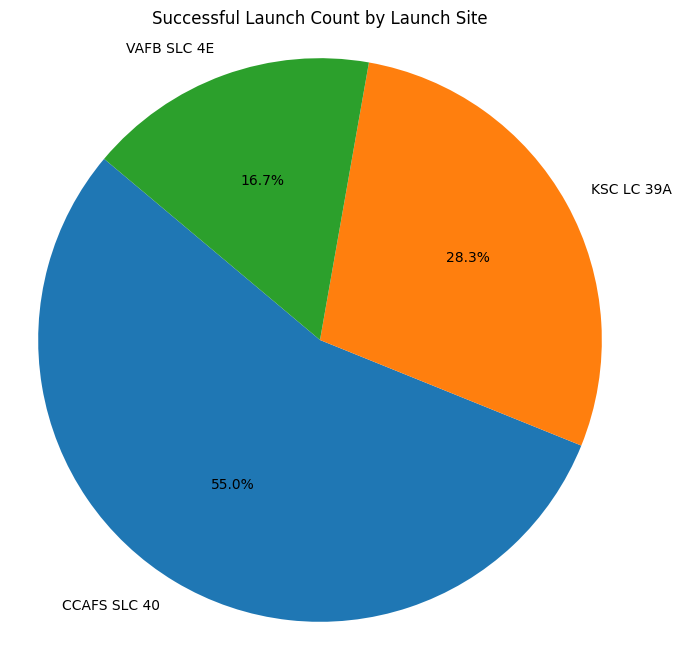


Explanation of the pie chart:
This pie chart shows the distribution of successful SpaceX rocket landings across different launch sites.
Each slice represents a launch site, and the size of the slice corresponds to the number of successful launches from that site, expressed as a percentage of the total successful launches across all sites.
You can observe which launch sites have contributed the most to the total count of successful landings.


In [17]:
import matplotlib.pyplot as plt

# Filter for successful launches (Class == 1)
successful_launches = df[df['Class'] == 1]

# Count successful launches per site
successful_launches_by_site = successful_launches['LaunchSite'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(successful_launches_by_site, labels=successful_launches_by_site.index, autopct='%1.1f%%', startangle=140)
plt.title('Successful Launch Count by Launch Site')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Explain the findings
print("\nExplanation of the pie chart:")
print("This pie chart shows the distribution of successful SpaceX rocket landings across different launch sites.")
print("Each slice represents a launch site, and the size of the slice corresponds to the number of successful launches from that site, expressed as a percentage of the total successful launches across all sites.")
print("You can observe which launch sites have contributed the most to the total count of successful landings.")

The launch site with the highest launch success ratio is: KSC LC 39A with a success rate of 0.77


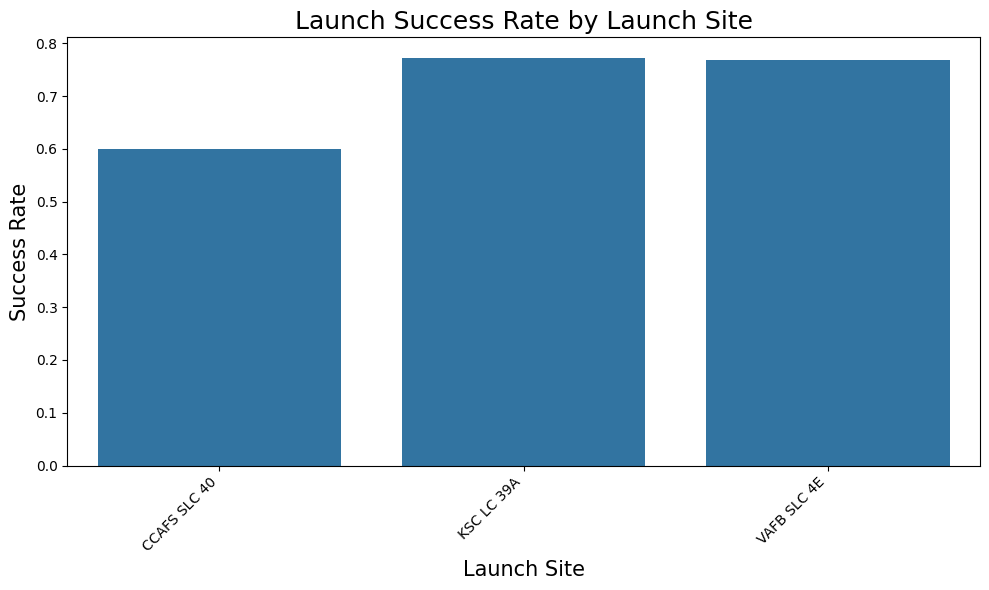


Explanation of the bar chart:
This bar chart shows the average success rate of rocket launches for each launch site.
The height of each bar represents the proportion of successful launches (Class = 1) out of the total launches from that site.
You can visually compare the success rates across the different launch sites to see which one has the highest performance.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the success rate for each launch site
launch_site_success_rate = df.groupby('LaunchSite')['Class'].mean().reset_index()

# Find the launch site with the highest success ratio
highest_success_site = launch_site_success_rate.loc[launch_site_success_rate['Class'].idxmax()]

print(f"The launch site with the highest launch success ratio is: {highest_success_site['LaunchSite']} with a success rate of {highest_success_site['Class']:.2f}")

# Create a bar chart to visualize the success rate of each launch site
plt.figure(figsize=(10, 6))
sns.barplot(x='LaunchSite', y='Class', data=launch_site_success_rate)
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Launch Success Rate by Launch Site", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explain the findings
print("\nExplanation of the bar chart:")
print("This bar chart shows the average success rate of rocket launches for each launch site.")
print("The height of each bar represents the proportion of successful launches (Class = 1) out of the total launches from that site.")
print("You can visually compare the success rates across the different launch sites to see which one has the highest performance.")

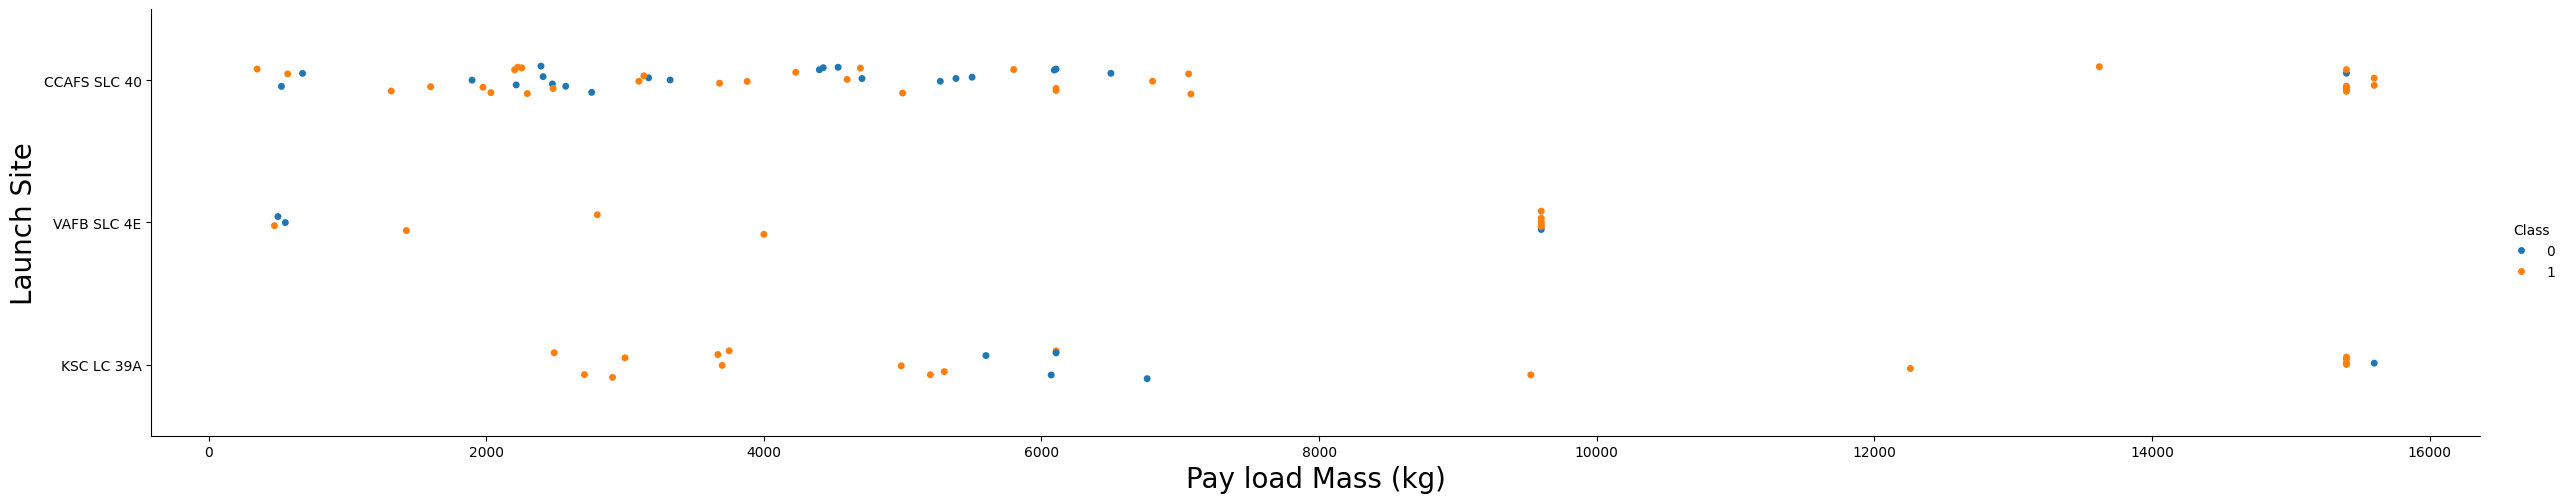

In [19]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()